**Example B:**  
We are going to use 3 layers  
optimizer we are going to use Adam  
We are going to use without normalization

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
data = pd.read_csv('/content/insurance_data.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
ins_data =pd.get_dummies(data)
ins_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,True,False,False
5,31,25.740,0,3756.62160,True,False,True,False,False,True,False


In [ ]:
x = ins_data.drop('charges', axis=1)
y = ins_data['charges']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

In [ ]:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

In [ ]:
history = model.fit(x_train,y_train,epochs=150,verbose=0)

In [ ]:
model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 7794.6768 - mae: 7794.6768


[7794.6767578125, 7794.6767578125]

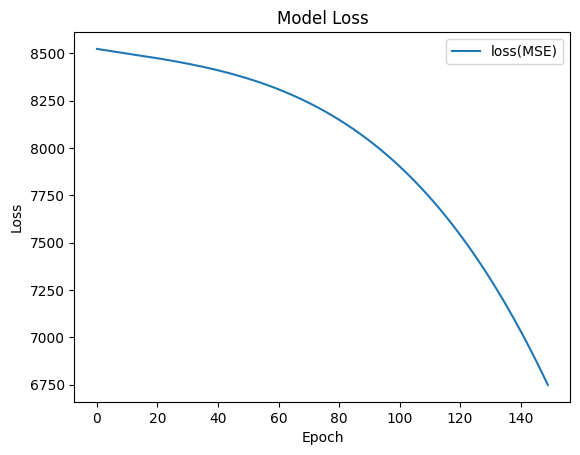

In [ ]:
plt.plot(history.history['loss'], label= 'loss(MSE)')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()